## Linear Regression in pytorch

In [2]:
import torch 
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

### Setps: 

<ol>
    <li> Prepare data
    <li> Define the model to be used 
    <li> define loss using existing classes or using an expression for custom loss functions
    <li> define optimizing algorithm and iterate 
</ol>


In [6]:
# create dataset using sklearn (which will be an nparray) and convert it into torch tensors of appropriate shape/size. 

X_numpy, y_numpy = datasets.make_regression(n_features=1, n_samples=200, noise=25, random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32)) # already a column vector
y = torch.from_numpy(y_numpy.astype(np.float32)) # row vector

y = y.view(y.shape[0], 1) # column vector

n_samples, n_features = X.shape

In [8]:
X_numpy.shape, y_numpy.shape, X.size(), y.size()

((200, 1), (200,), torch.Size([200, 1]), torch.Size([200, 1]))

### Model definition

In [10]:
?nn.Linear

Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies an affine linear transformation to the incoming data: :math:`y = xA^T + b`.

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
       

In [11]:
# see nn.Linear() documentation as on constructor parameters

input_size = n_features # dimension of X
output_size = 1 # output y is single dimension

model = nn.Linear(in_features=input_size, out_features=output_size, bias = True)

### Loss and optimizer

In [13]:
learning_rate = 0.01

# mean square error exists already 
loss_fn = nn.MSELoss() #callable function
optimizer = torch.optim.SGD(params=model.parameters(), lr = learning_rate)

### epoch define

In [16]:
max_iters = 500
epoch = 0

for epoch in range(max_iters):
    
    # forward pass
    y_pred = model(X)
    # loss
    loss = loss_fn(y_pred, y)
    # backward pass
    loss.backward()
    #update
    optimizer.step()
    # gradient flush
    optimizer.zero_grad()
    # track 
    if epoch %20 == 0:
        print(f'epoch {epoch}: loss = {loss}')

epoch 0: loss = 833.39794921875
epoch 20: loss = 734.3963012695312
epoch 40: loss = 684.8690795898438
epoch 60: loss = 660.0790405273438
epoch 80: loss = 647.6652221679688
epoch 100: loss = 641.4462280273438
epoch 120: loss = 638.32958984375
epoch 140: loss = 636.7672119140625
epoch 160: loss = 635.9837036132812
epoch 180: loss = 635.5906372070312
epoch 200: loss = 635.3934936523438
epoch 220: loss = 635.2945556640625
epoch 240: loss = 635.2449340820312
epoch 260: loss = 635.219970703125
epoch 280: loss = 635.2073974609375
epoch 300: loss = 635.2012329101562
epoch 320: loss = 635.1981201171875
epoch 340: loss = 635.1964721679688
epoch 360: loss = 635.1956176757812
epoch 380: loss = 635.1952514648438
epoch 400: loss = 635.195068359375
epoch 420: loss = 635.1949462890625
epoch 440: loss = 635.1949462890625
epoch 460: loss = 635.1949462890625
epoch 480: loss = 635.19482421875


So the least loss is achieved at ~300th iteration approximately. Interesting. 

In [20]:
model._parameters

{'weight': Parameter containing:
 tensor([[86.8074]], requires_grad=True),
 'bias': Parameter containing:
 tensor([3.5706], requires_grad=True)}

And there we have the equation of the line stored in the _parameters attribute of the model object. the API here is really similar to scikit-learn. 

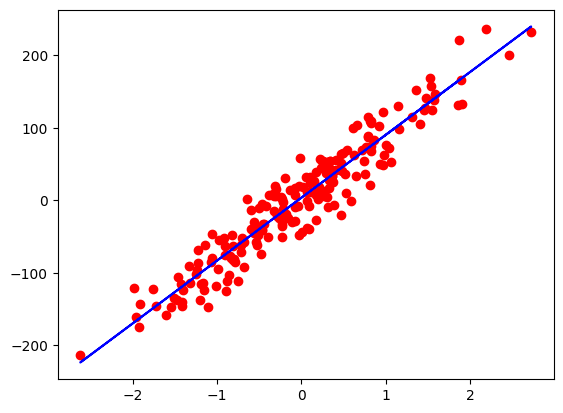

In [17]:
# plotting

predicted_vals = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted_vals, 'b-')
plt.show()